# Welcome to My Project 101!

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
ecom = pd.read_csv('data.csv')

# 1. Cleaning the data

In [3]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### The data has 541909 entries and 8 variables

In [4]:
ecom.shape

(541909, 8)

In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Change column names 

In [6]:
ecom.rename(columns = {'InvoiceNo' : 'invoice_num',
                       'StockCode' : 'stock_code',
                       'Description' : 'description',
                       'Quantity' : 'quantity',
                       'InvoiceDate' : 'invoice_date',
                       'UnitPrice' : 'unit_price',
                       'CustomerID' : 'cust_id',
                       'Country' : 'country'}, inplace = True)

In [7]:
ecom.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Check missing values for each column

In [8]:
ecom.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

## Check and remove missing values for each row

In [9]:
ecom[ecom.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [10]:
# ecom_new without missing values

ecom_new = ecom.dropna()

In [11]:
ecom_new.isnull().sum().sort_values(ascending = False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [12]:
ecom_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   406829 non-null  object 
 1   stock_code    406829 non-null  object 
 2   description   406829 non-null  object 
 3   quantity      406829 non-null  int64  
 4   invoice_date  406829 non-null  object 
 5   unit_price    406829 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## Change `cust_id ` dtype - Float to Interger 

In [13]:
ecom_new['cust_id'] = ecom_new['cust_id'].astype('int64')

<ipython-input-13-274dd8f3540e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_new['cust_id'] = ecom_new['cust_id'].astype('int64')


Use **class of ChainedAssignent** to solve "SettingWithCopyWarning".

**What it is?**

When filtering DataFrames, it is possible slice/index a frame to return either a view, or a copy, depending on the internal layout and various implementation details. A "view" is, as the term suggests, a view into the original data, so modifying the view may modify the original object. On the other hand, a "copy" is a replication of data from the original, and modifying the copy has no effect on the original.

**How it works?**
A nice way of non-intrusively changing the mode (modified from this gist) using a context manager, to set the mode only as long as it is required, and then reset it back to the original state when finished.

source: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas


In [14]:
class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw

In [15]:
with ChainedAssignent():
    ecom_new['cust_id'] = ecom_new['cust_id'].astype('int64')

In [16]:
ecom_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


## Change `invoice_num` dtype - Object to Interger 

In [17]:
ecom_new['invoice_num'] = ecom_new['invoice_num'].astype('int64')

ValueError: invalid literal for int() with base 10: 'C536379'

It looks like there are datas in invoice_num that starts with a "C" in front of it. Assuming "C" is referring to cancelled transactions. So, below is the feature to filter out theses cases:

In [18]:
ecom_new["iscancelled"]=np.where(ecom_new.invoice_num.apply(lambda l: l[0]=="C"), True, False)
ecom_new.iscancelled.value_counts() / ecom_new.shape[0] * 100

<ipython-input-18-d062cb79141c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_new["iscancelled"]=np.where(ecom_new.invoice_num.apply(lambda l: l[0]=="C"), True, False)


False    97.81112
True      2.18888
Name: iscancelled, dtype: float64

2.2% of all entries are cancelled transactions.

In [19]:
ecom_new = ecom_new.loc[ecom_new.iscancelled==False].copy()
ecom_new = ecom_new.drop("iscancelled", axis=1)

In [20]:
ecom_new['invoice_num'] = ecom_new['invoice_num'].astype('int64')

In [22]:
ecom_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   397924 non-null  int64  
 1   stock_code    397924 non-null  object 
 2   description   397924 non-null  object 
 3   quantity      397924 non-null  int64  
 4   invoice_date  397924 non-null  object 
 5   unit_price    397924 non-null  float64
 6   cust_id       397924 non-null  int64  
 7   country       397924 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 27.3+ MB


## Change `invoice_date` dtype - String to Timestamp 

In [23]:
ecom_new['invoice_date'] = pd.to_datetime(ecom_new.invoice_date, format = '%m/%d/%Y %H:%M')

In [24]:
ecom_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [25]:
ecom_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  int64         
 1   stock_code    397924 non-null  object        
 2   description   397924 non-null  object        
 3   quantity      397924 non-null  int64         
 4   invoice_date  397924 non-null  datetime64[ns]
 5   unit_price    397924 non-null  float64       
 6   cust_id       397924 non-null  int64         
 7   country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.3+ MB


## Check for negative values

In [26]:
ecom_new.describe().round(2)

,invoice_num,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00,397924.00
mean,560617.13,13.02,3.12,15294.32
std,13106.17,180.42,22.10,1713.17
min,536365.00,1.00,0.00,12346.00
25%,549234.00,2.00,1.25,13969.00
50%,561893.00,6.00,1.95,15159.00
75%,572090.00,12.00,3.75,16795.00
max,581587.00,80995.00,8142.75,18287.00


## Add column - `sales`

In [28]:
ecom_new['sales'] = ecom_new['quantity'] * ecom_new['unit_price']

In [29]:
# Rearrange all columns for easy reference

ecom_new = ecom_new[['invoice_num', 'invoice_date', 'stock_code', 'description', 'quantity', 'unit_price', 'sales', 'cust_id', 'country']]

## Add column - `year_month`

In [30]:
ecom_new.insert(loc=2, column='year_month', value=ecom_new['invoice_date'].map(lambda x: 100*x.year + x.month))

In [31]:
ecom_new.tail()

,invoice_num,invoice_date,year_month,stock_code,description,quantity,unit_price,sales,cust_id,country
541904,581587,2011-12-09 12:50:00,201112,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,12680,France
541908,581587,2011-12-09 12:50:00,201112,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,14.85,12680,France


In [32]:
ecom_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  int64         
 1   invoice_date  397924 non-null  datetime64[ns]
 2   year_month    397924 non-null  int64         
 3   stock_code    397924 non-null  object        
 4   description   397924 non-null  object        
 5   quantity      397924 non-null  int64         
 6   unit_price    397924 non-null  float64       
 7   sales         397924 non-null  float64       
 8   cust_id       397924 non-null  int64         
 9   country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 33.4+ MB


# 2. Data Analysis

The analysis consists of the comparison between sales and number of orders for the categories as below:

2.1 SALES ANALYSIS
1. Sales per month
2. Sales per customers
3. Sales per country

2.2 ORDERS ANALYSIS
1. Orders per month
2. Orders per customers
3. Orders per country

## Colour and Style settings

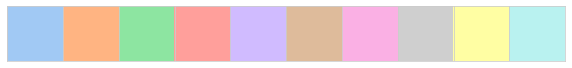

In [36]:
sns.set_style('whitegrid')
color = sns.color_palette('pastel')
sns.palplot(color)

## 2.1.1 Sales per Month

In [37]:
ecom_new.groupby('year_month')['sales'].sum().round(2)

year_month
201012     572713.89
201101     569445.04
201102     447137.35
201103     595500.76
201104     469200.36
201105     678594.56
201106     661213.69
201107     600091.01
201108     645343.90
201109     952838.38
201110    1039318.79
201111    1161817.38
201112     518192.79
Name: sales, dtype: float64

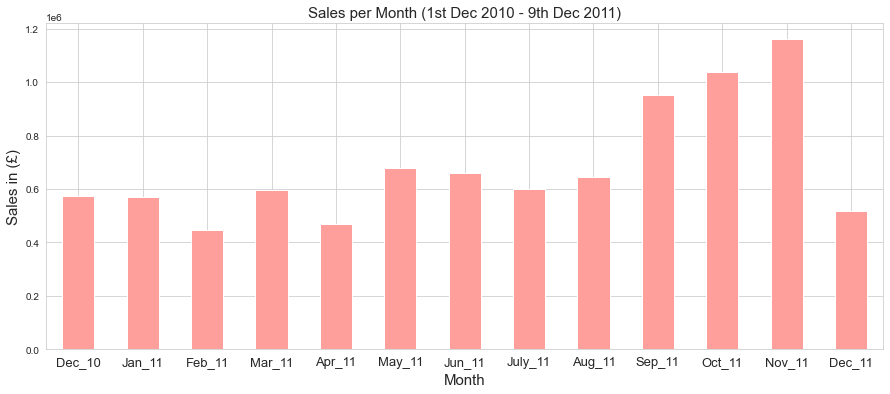

In [38]:
v1 = ecom_new.groupby('year_month')['sales'].sum().plot(kind='bar',color=color[3],figsize=(15,6))

v1.set_xlabel('Month',fontsize=15)
v1.set_ylabel('Sales in (£)',fontsize=15)
v1.set_title('Sales per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
v1.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## 2.2.1 Orders per Month

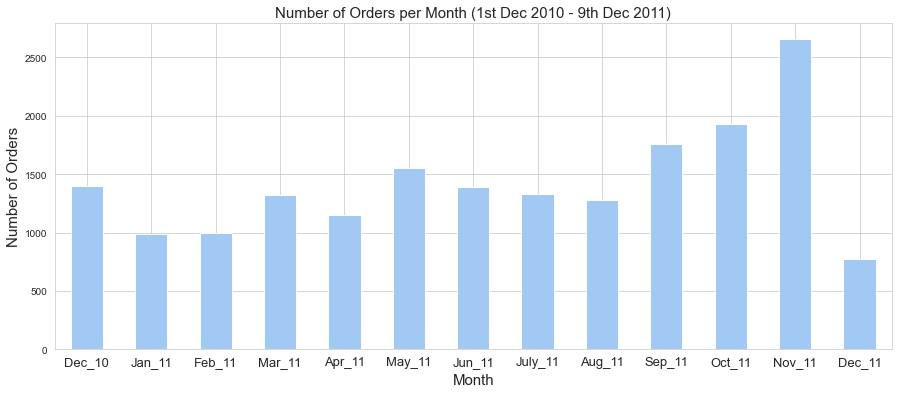

In [42]:
v2 = ecom_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))

v2.set_xlabel('Month',fontsize=15)
v2.set_ylabel('Number of Orders',fontsize=15)
v2.set_title('Number of Orders per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
v2.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## 2.1.2 Sales per Customers

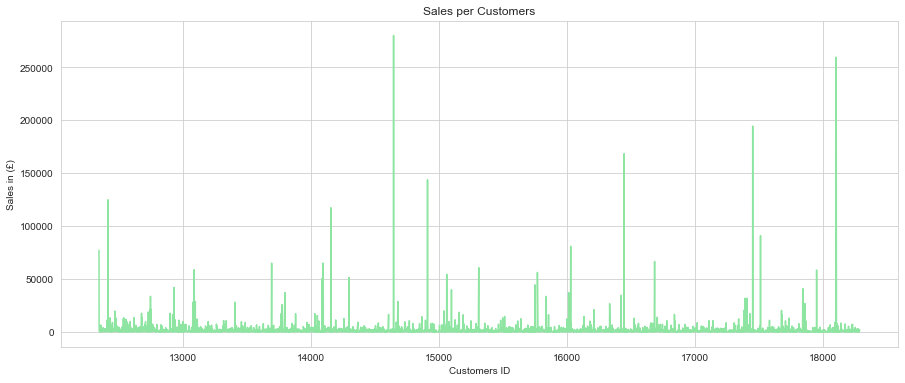

In [48]:
v3 = ecom_new.groupby(by=['cust_id','country'], as_index=False)['sales'].sum()

plt.subplots(figsize=(15,6))
plt.plot(v3.cust_id, v3.sales, color=color[2])
plt.xlabel('Customers ID')
plt.ylabel('Sales in (£)')
plt.title('Sales per Customers')
plt.show()

## Top 5 Customers with highest Sales

In [49]:
v3.sort_values(by='sales', ascending=False).head()

,cust_id,country,sales
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


## 2.2.2 Orders per Customers

## Top 5 Customers with highest Orders

In [52]:
v4.sort_values(by='invoice_num', ascending=False).head()

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


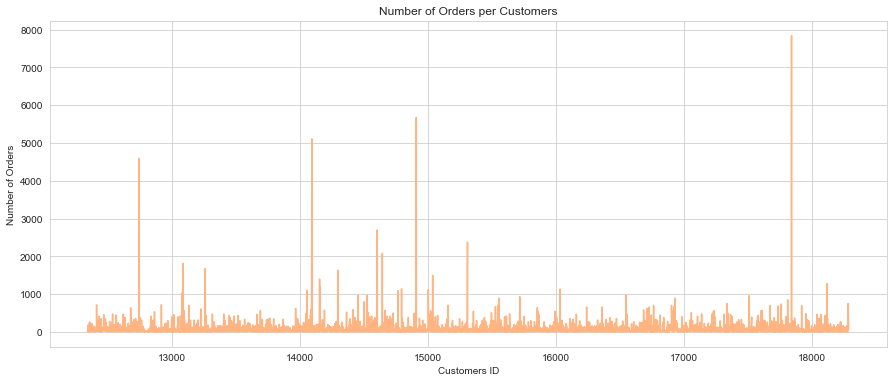

In [51]:
v4 = ecom_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(v4.cust_id, v4.invoice_num, color=color[1])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customers')
plt.show()

## 2.1.3 Sales per Country

In [54]:
ecom_new.groupby('country')['sales'].sum().sort_values(ascending = False)

country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

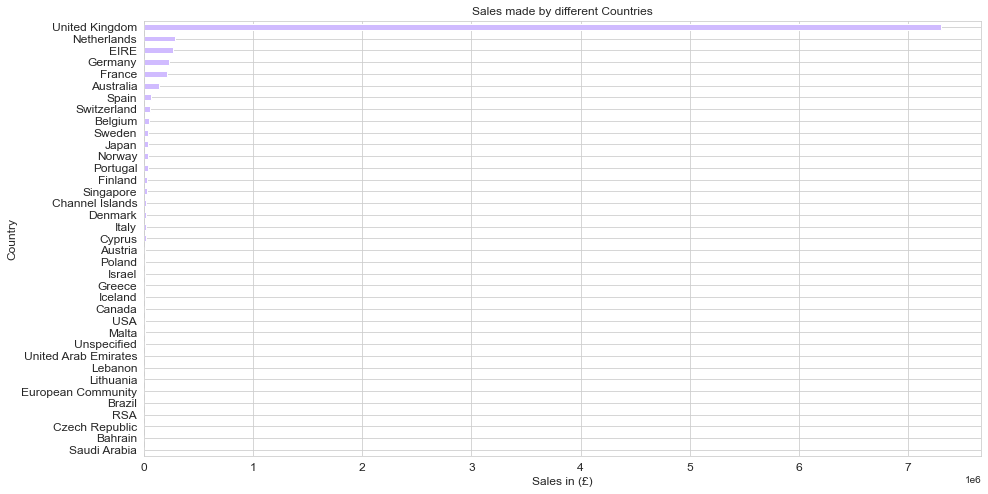

In [55]:
v5 = ecom_new.groupby('country')['sales'].sum().sort_values()

plt.subplots(figsize=(15,8))
v5.plot(kind='barh', fontsize=12, color=color[4])
plt.xlabel('Sales in (£)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Sales made by different Countries', fontsize=12)
plt.show()

## Delete country ['United Kingdom']

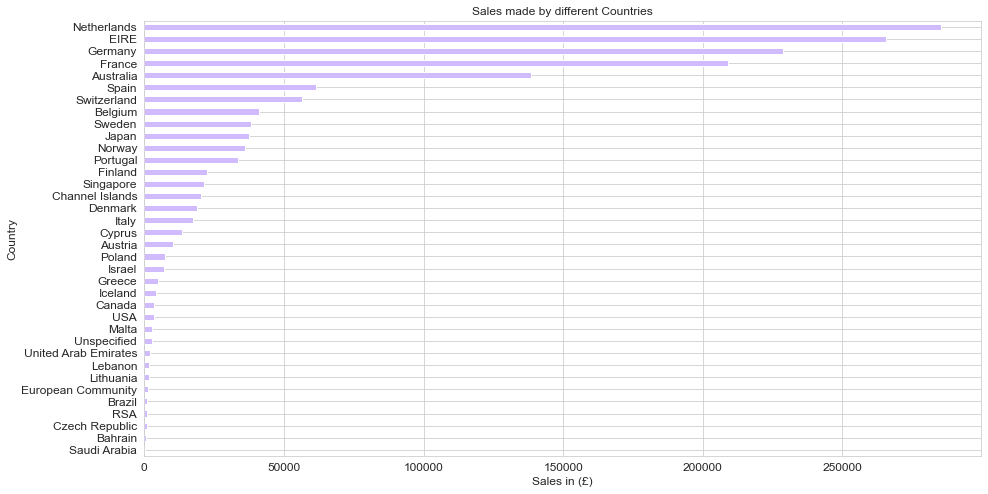

In [56]:
v5 = ecom_new.groupby('country')['sales'].sum().sort_values()

del v5['United Kingdom']

plt.subplots(figsize=(15,8))
v5.plot(kind='barh', fontsize=12, color=color[4])
plt.xlabel('Sales in (£)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Sales made by different Countries', fontsize=12)
plt.show()

## 2.2.3 Orders per Country

In [57]:
ecom_new.groupby('country')['invoice_num'].sum().sort_values(ascending = False)

country
United Kingdom          198671536820
Germany                   5062132721
France                    4677673476
EIRE                      4065392395
Spain                     1389333461
Netherlands               1321088257
Belgium                   1138462862
Switzerland               1032386263
Portugal                   819502983
Australia                  659118272
Norway                     603778939
Italy                      425518649
Channel Islands            417972473
Finland                    382635802
Cyprus                     341888568
Sweden                     252381184
Austria                    223822318
Denmark                    213742248
Poland                     184045618
Japan                      176939004
Israel                     139566069
Unspecified                136422853
Singapore                  123098270
USA                        102037846
Iceland                    101296926
Canada                      84252636
Greece                      80

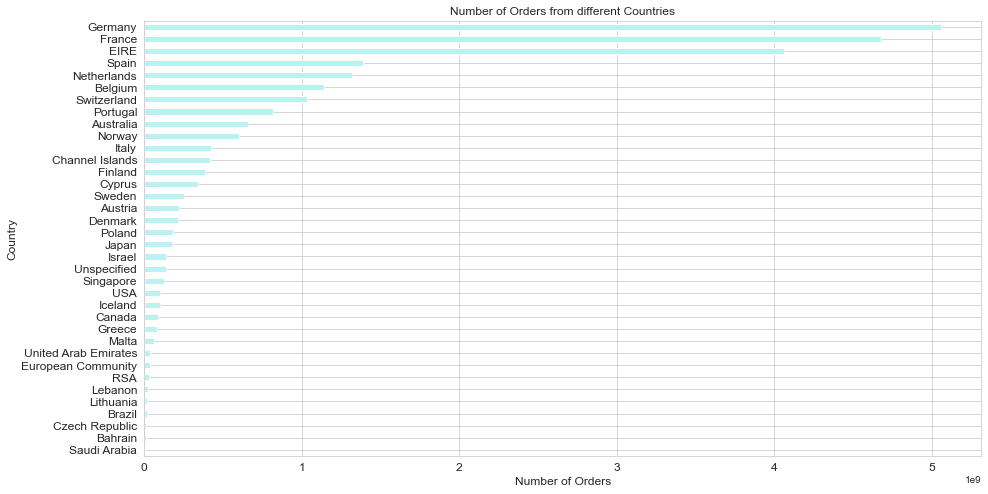

In [58]:
v6 = ecom_new.groupby('country')['invoice_num'].sum().sort_values()

del v6['United Kingdom']

plt.subplots(figsize=(15,8))
v6.plot(kind='barh', fontsize=12, color=color[9])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders from different Countries', fontsize=12)
plt.show()

# 3. Summary & User Input

From the analysis above, there are a few questions that now can be answered.Please enter the code of questions as below:

| Codes  |  Questions           | 
| :-----:|:------------------- | 
| 1      | Top 5 months with highest sales? | 
| 2      | Top 5 months with highest orders?|   
| 3      | Top 5 customers with highest sales?|
| 4      | Top 5 customers with highest orders?|
| 5      | Top  5 countries with highest sales? |
| 6      | Top  5 countries with highest orders? |


In [73]:
choose = ""

while choose != "exit":
    
    choose = input("Please enter code of the question:")
    
    if choose == '1':
        print(f'Top 5 months with highest sales: \n' 
              f'1. Nov_11 with £ 1 161 817.38 of sales. \n'
              f'2. Oct_11 with £ 1 039 318.79 of sales. \n'
              f'3. Sept_11 with £ 952 838.38 of sales. \n'
              f'4. May_11 with £ 678 594.56 of sales. \n'
              f'5. Jun_11 with £ 661 213.69 of sales. \n')
        
    elif choose == '2':
        print(f'Top 5 months with highest orders: \n'
               f'1. Nov_11 with 2 658 number of orders. \n'
               f'2. Oct_11 with 1 929 number of orders. \n'
               f'3. Sept_11 with 1 756 number of orders. \n' 
               f'4. May_11 with 1 555 number of orders. \n'
               f'5. Jun_11 with 1 393 number of orders. \n')
          
    elif choose == '3':
        print(f'Top 5 customers with highest sales: \n'
               f'1. Cust_id: 14646 from Netherlands = £ 280 206.02 \n'   
               f'2. Cust_id: 18102 from United Kingdom = £ 259 657.30 \n'
               f'3. Cust_id: 17450 from United Kingdom = £ 194 550.79 \n'
               f'4. Cust_id: 16446 from United Kingdom = £ 168 472.50 \n'
               f'5. Cust_id: 14911 from EIRE = £ 143 825.06 \n')
        
    elif choose == '4':
        print(f'Top 5 customers with highest orders \n'
               f'1. Cust_id: 17841 from United Kingdom with 7847 orders. \n'
               f'2. Cust_id: 14911 from EIRE with 5677 orders. \n'
               f'3. Cust_id: 14096 from United Kingdom with 5111 orders. \n'
               f'4. Cust_id: 12748 from United Kingdom with 4596 orders. \n'
               f'5. Cust_id: 14606 from United Kingdom with 2700 orders. \n')
        
    elif choose == '5':
        print(f'Top 5 countries with highest sales: \n'
               f'1. United Kingdom with £ 7 308 392.00  of sales. \n'
               f'2. Netherlands with £ 285 446.30 of sales. \n'
               f'3. EIRE with £ 265 545.90 of sales. \n'
               f'4. Germany with £ 228 867.10 of sales. \n'
               f'5. France with £ 209 024.00 of sales. \n')   
        
    elif choose == '6':
        print(f'Top  5 countries with highest orders: \n'
               f'1. United Kingdom with 198 671 536 820 number of orders. \n'
               f'2. Germany with 5 062 132 721 number of orders. \n'
               f'3. France with 4 677 673 476 number of orders. \n'
               f'4. EIRE with 4 065 392 395 number of orders. \n'
               f'5. Spain with 1 389 333 461 number of orders. \n')
        
    elif choose == 'exit':
        print("Thank you!") 
        
    else:
        print("Please enter the right code.")

Please enter code of the question:exit
Thank you!
